In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [24]:
def clean_and_read():
    files = os.listdir() 
    files = [f for f in files if f.endswith('.xlsx') if "Grupplista" in f]
    df = pd.read_excel(files[0])

    df = df[["Förnamn", "Efternamn", "Telefon 1", "Telefon 2", "Kommentar", "Referens", "Erlagt", "Belopp"]]

    df = df[df["Kommentar"] != ""]
    df["Kommentar"] = df["Kommentar"].str.replace(" ", "")

    df["Namn"] = df["Förnamn"] + " " + df["Efternamn"]
    df = df.drop(["Förnamn", "Efternamn"], axis=1)

    df["Betald"] = df["Erlagt"] >= df["Belopp"]
    df = df.drop(["Erlagt", "Belopp"], axis=1)

    df = df[["Namn", "Telefon 1", "Telefon 2", "Kommentar", "Betald"]]
    df = df.sort_values(by="Kommentar")

    return df

df = clean_and_read()

In [25]:
A_layout = np.array([
    [None, "A102", "V", "A08", "A22", "V", "A36", "A50", "V", "A64", None],
    ["A89", "A103", "V", "A09", "A23", "V", "A37", "A51", "V", "A65", "A77"],
    ["A90", "A104", "V", "A10", "A24", "V", "A38", "A52", "V", "A66", "A78"],
    ["A91", "A105", "V", "A11", "A25", "V", "A39", "A53", "V", "A67", "A79"],
    ["A92", "A106", "V", "A12", "A26", "V", "A40", "A54", "V", "A68", "A80"],
    ["A93", "A107", "V", "A13", "A27", "V", "A41", "A55", "V", "A69", "A81"],
    ["A94", "A108", "V", "A14", "A28", "V", "A42", "A56", "V", "A70", "A82"],
    ["V", "V", "V", "V", "V", "V", "V", "V", "V", "V", "V"],
    [None, "A95", "V", "A01", "A15", "V", "A29", "A43", "V", "A57", None],
    ["A83", "A96", "V", "A02", "A16", "V", "A30", "A44", "V", "A58", "A71"],
    ["A84", "A97", "V", "A03", "A17", "V", "A31", "A45", "V", "A59", "A72"],
    ["A85", "A98", "V", "A04", "A18", "V", "A32", "A46", "V", "A60", "A73"],
    ["A86", "A99", "V", "A05", "A19", "V", "A33", "A47", "V", "A61", "A74"],
    ["A87", "A100", "V", "A06", "A20", "V", "A34", "A48", "V", "A62", "A75"],
    ["A88", "A101", "V", "A07", "A21", "V", "A35", "A49", "V", "A63", "A76"],
])
A_widths = [1 if col not in {2, 5, 8} else 0.1 for col in range(A_layout.shape[1])]
A_heights = [1] * A_layout.shape[0]

B_layout = np.array([
    ["B13", "B19", "V", "B25", "B31", "V", "B37", None, "B43", "V", "B49", None, "B55", "V", "B61", None, "B67", "V", "B73", None, "B79", "V", "B85", "B91", "B97"],
    ["B14", "B20", "V", "B26", "B32", "V", "B38", "B3844", "B44", "V", "B50", "B5056", "B56", "V", "B62", "B6268", "B68", "V", "B74", "B7480", "B80", "V", "B86", "B92", "B98"],
    ["B15", "B21", "V", "B27", "B33", "V", "B39", "B3945", "B45", "V", "B51", "B5157", "B57", "V", "B63", "B6369", "B69", "V", "B75", "B7581", "B81", "V", "B87", "B93", "B99"],
    ["B16", "B22", "V", "B28", "B34", "V", "B40", "B4046", "B46", "V", "B52", "B5258", "B58", "V", "B64", "B6470", "B70", "V", "B76", "B7682", "B82", "V", "B88", "B94", "B100"],
    ["B17", "B23", "V", "B29", "B35", "V", "B41", "B4147", "B47", "V", "B53", "B5359", "B59", "V", "B65", "B6571", "B71", "V", "B77", "B7783", "B83", "V", "B89", "B95", "B101"],
    ["B18", "B24", "V", "B30", "B36", "V", "B42", "B4248", "B48", "V", "B54", "B5460", "B60", "V", "B66", "B6672", "B72", "V", "B78", "B7884", "B84", "V", "B90", "B96", "B102"],
])
B_widths = [1 if col not in {2, 5, 9, 13, 17, 21} else 0.1 for col in range(B_layout.shape[1])]
B_widths[2] = 0.3
B_widths[5] = 0.3
B_heights = [1] * B_layout.shape[0]

C_layout = np.array([
    ["C85", "C91", "V", "C49", "C55", "V", "C61", "C67", "V", "C73", "C79"],
    ["C86", "C92", "V", "C50", "C56", "V", "C62", "C68", "V", "C74", "C80"],
    ["C87", "C93", "V", "C51", "C57", "V", "C63", "C69", "V", "C75", "C81"],
    ["C88", "C94", "V", "C52", "C58", "V", "C64", "C70", "V", "C76", "C82"],
    ["C89", "C95", "V", "C53", "C59", "V", "C65", "C71", "V", "C77", "C83"],
    ["C90", "C96", "V", "C54", "C60", "V", "C66", "C72", "V", "C78", "C84"],
])
C_widths = [1 if col not in {2, 5, 8} else 0.1 for col in range(C_layout.shape[1])]
C_heights = [1] * C_layout.shape[0]

D_layout = np.array([
    ["D05", "D10", "V", "D15", "D20", "V", "D25", "D30", "V", "D35", "D40", "V", "D45", "D50", "V", "D55", "D60", "V", "D65", "D70", "V", "D75", "D80", "V", "D85", "D90", "V", "D95", "D100"],
    ["D04", "D09", "V", "D14", "D19", "V", "D24", "D29", "V", "D34", "D39", "V", "D44", "D49", "V", "D54", "D59", "V", "D64", "D69", "V", "D74", "D79", "V", "D84", "D89", "V", "D94", "D99"],
    ["D03", "D08", "V", "D13", "D18", "V", "D23", "D28", "V", "D33", "D38", "V", "D43", "D48", "V", "D53", "D58", "V", "D63", "D68", "V", "D73", "D78", "V", "D83", "D88", "V", "D93", "D98"],
    ["D02", "D07", "V", "D12", "D17", "V", "D22", "D27", "V", "D32", "D37", "V", "D42", "D47", "V", "D52", "D57", "V", "D62", "D67", "V", "D72", "D77", "V", "D82", "D87", "V", "D92", "D97"],
    ["D01", "D06", "V", "D11", "D16", "V", "D21", "D26", "V", "D31", "D36", "V", "D41", "D46", "V", "D51", "D56", "V", "D61", "D66", "V", "D71", "D76", "V", "D81", "D86", "V", "D91", "D96"]
])
D_widths = [1 if col not in {2, 5, 8, 11, 14, 17, 20, 23, 26} else 0.1 for col in range(D_layout.shape[1])]
D_heights = [1] * D_layout.shape[0]

P_layout = np.array([
    ["P01", "P06", "V", "P11", "P16", "V", "P21", "P26"],
    ["P02", "P07", "V", "P12", "P17", "V", "P22", "P27"],
    ["P03", "P08", "V", "P13", "P18", "V", "P23", "P28"],
    ["P04", "P09", "V", "P14", "P19", "V", "P24", "P29"],
    ["P05", "P10", "V", "P15", "P20", "V", "P25", "P30"],
    ["P31", "P32", "V", "P33", "P34", "V", "P35", "P36"]
])
P_widths = [1 if col not in {2, 5} else 0.1 for col in range(P_layout.shape[1])]
P_heights = [1] * P_layout.shape[0]

In [26]:
def plot_spots(layout, widths, heights, df, rotate_text=False, save=True, text_x=0.5, text_y=0.5, title_x=0.5, title_y=0.9):
    rows, cols = layout.shape

    fig, ax = plt.subplots(rows, cols, figsize=(11.7, 8.3), gridspec_kw={'width_ratios': widths, 'height_ratios': heights})

    for member in df.iterrows():
        row, col = np.where(layout == member[1]["Kommentar"])

        try:
            row, col = row[0], col[0]
        except IndexError:
            print(f"Plats {member[1]['Kommentar']} ej hittad! Är den felstavad?")
            continue

        # Chekc if ax[row, col] already has a text
        if ax[row, col].texts:
            print(f"Dubbelbokning på plats {member[1]["Kommentar"]}!")
            ax[row, col].set_facecolor("#f2b963")

        ax[row, col].text(text_x, text_y, f"{member[1]['Namn']}\n{member[1]['Telefon 1']}\n{member[1]['Telefon 2']}", ha="center", va="center", wrap=True, fontsize=7, rotation=90*rotate_text)

        if not member[1]["Betald"]:  # Rödmarkera obetalda
            ax[row, col].set_facecolor("#f0624f")

    for row in range(rows):
        for col in range(cols):
            if layout[row, col] is None:
                ax[row, col].set_facecolor("#cccccc")
                
                #ax[row, col].plot([0, 1], [0, 1], color="black", linewidth=2)
                #ax[row, col].plot([0, 1], [1, 0], color="black", linewidth=2)
            elif layout[row, col] == "V":
                ax[row, col].set_facecolor("#cccccc")
            else:
                if not ax[row, col].texts:
                    ax[row, col].set_facecolor("#f0e84f")
                ax[row, col].text(title_x, title_y, layout[row, col], ha="center", va="center", wrap=True, fontsize=12)
            ax[row, col].set_xticks([])  # Hide x-axis
            ax[row, col].set_yticks([])  # Hide y-axis

    fig.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
    
    if save:
        plt.savefig(f"{layout[1, 1][0]}_förråd.pdf", bbox_inches='tight')

Dubbelbokning på plats A47!
Plats Avslutad ej hittad! Är den felstavad?
Dubbelbokning på plats C89!
Plats P40 ej hittad! Är den felstavad?
Plats P42 ej hittad! Är den felstavad?
Plats P43 ej hittad! Är den felstavad?
Plats P44 ej hittad! Är den felstavad?
Plats P46 ej hittad! Är den felstavad?
Plats P52 ej hittad! Är den felstavad?
Plats P53 ej hittad! Är den felstavad?
Plats P56 ej hittad! Är den felstavad?
Plats P58 ej hittad! Är den felstavad?
Plats P60 ej hittad! Är den felstavad?
Plats P61 ej hittad! Är den felstavad?
Plats P62 ej hittad! Är den felstavad?
Plats P68 ej hittad! Är den felstavad?


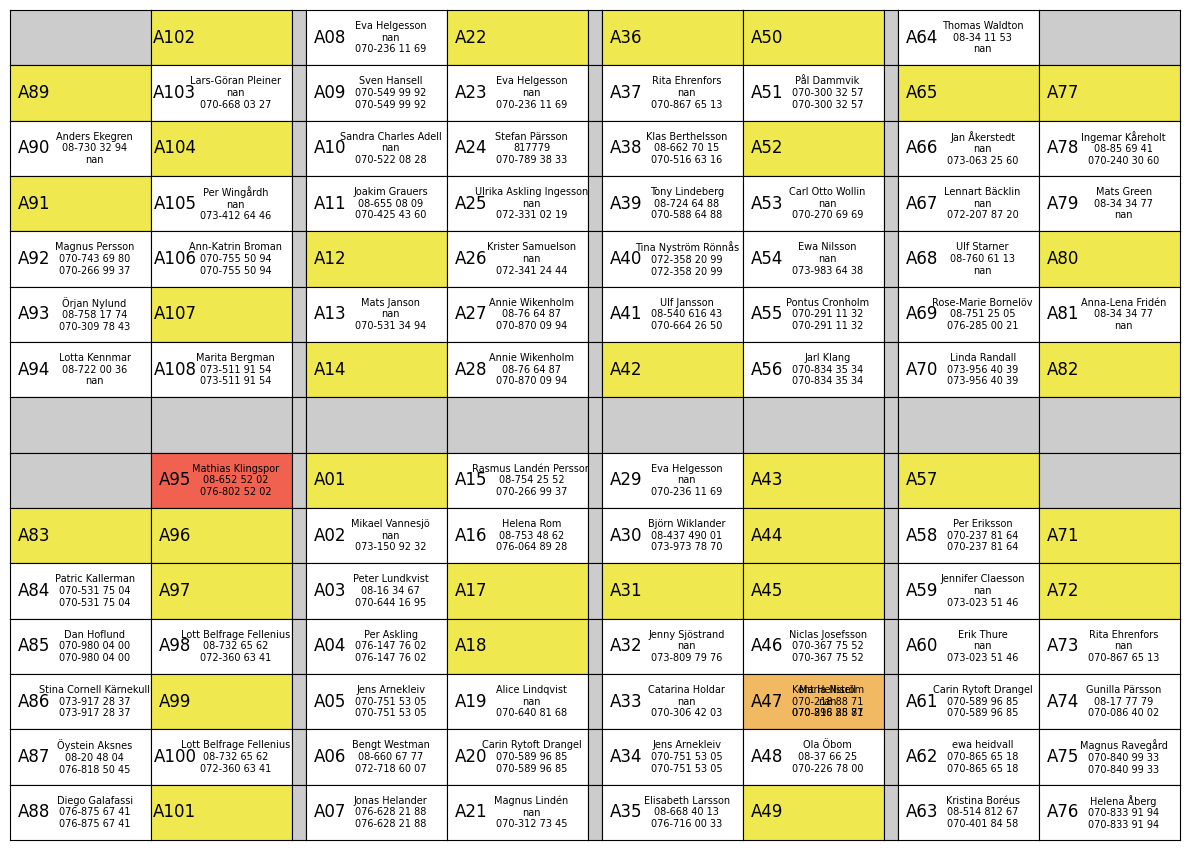

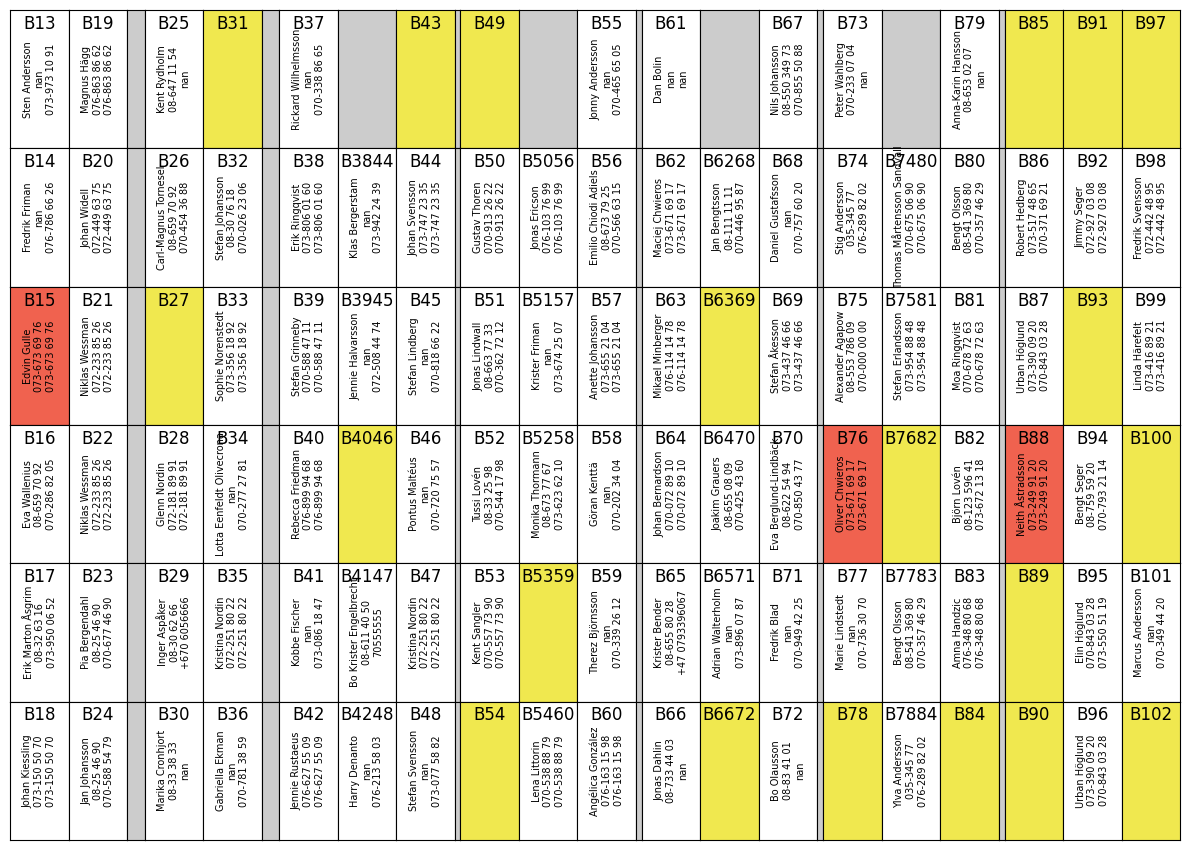

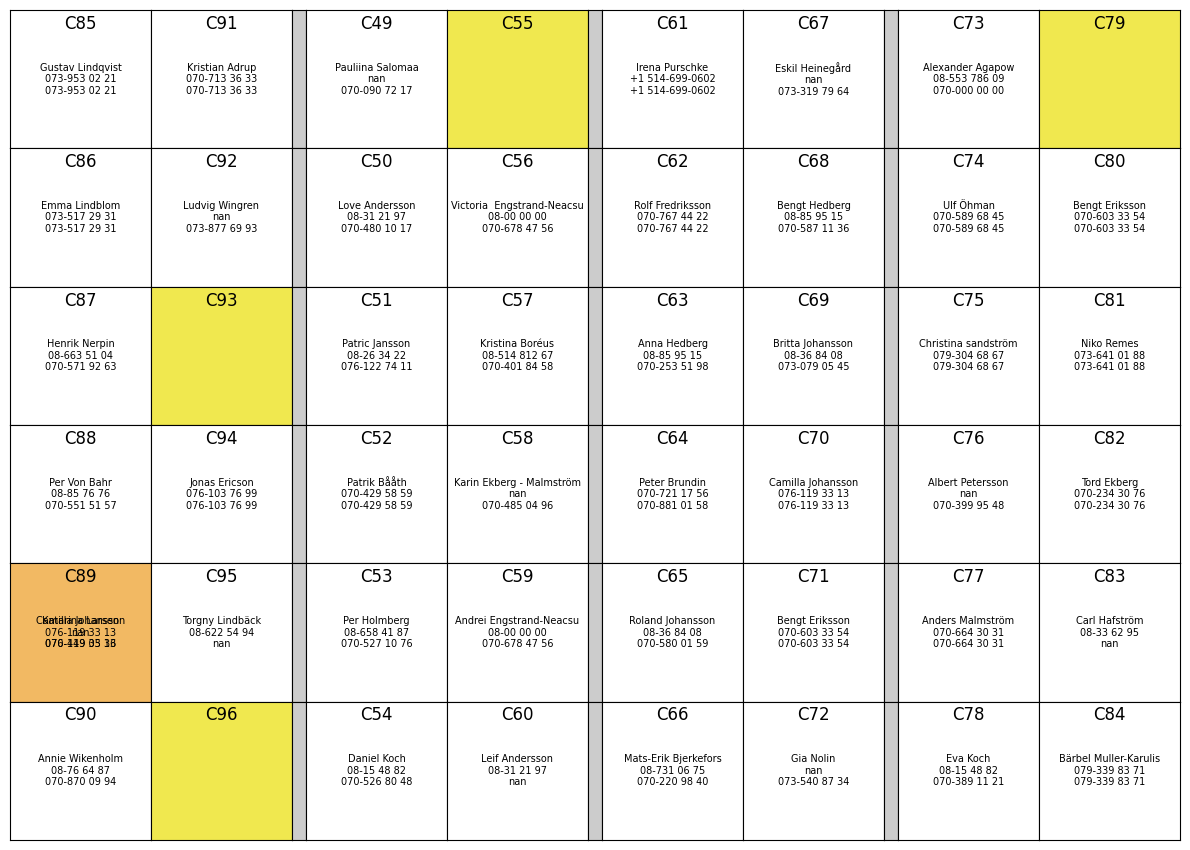

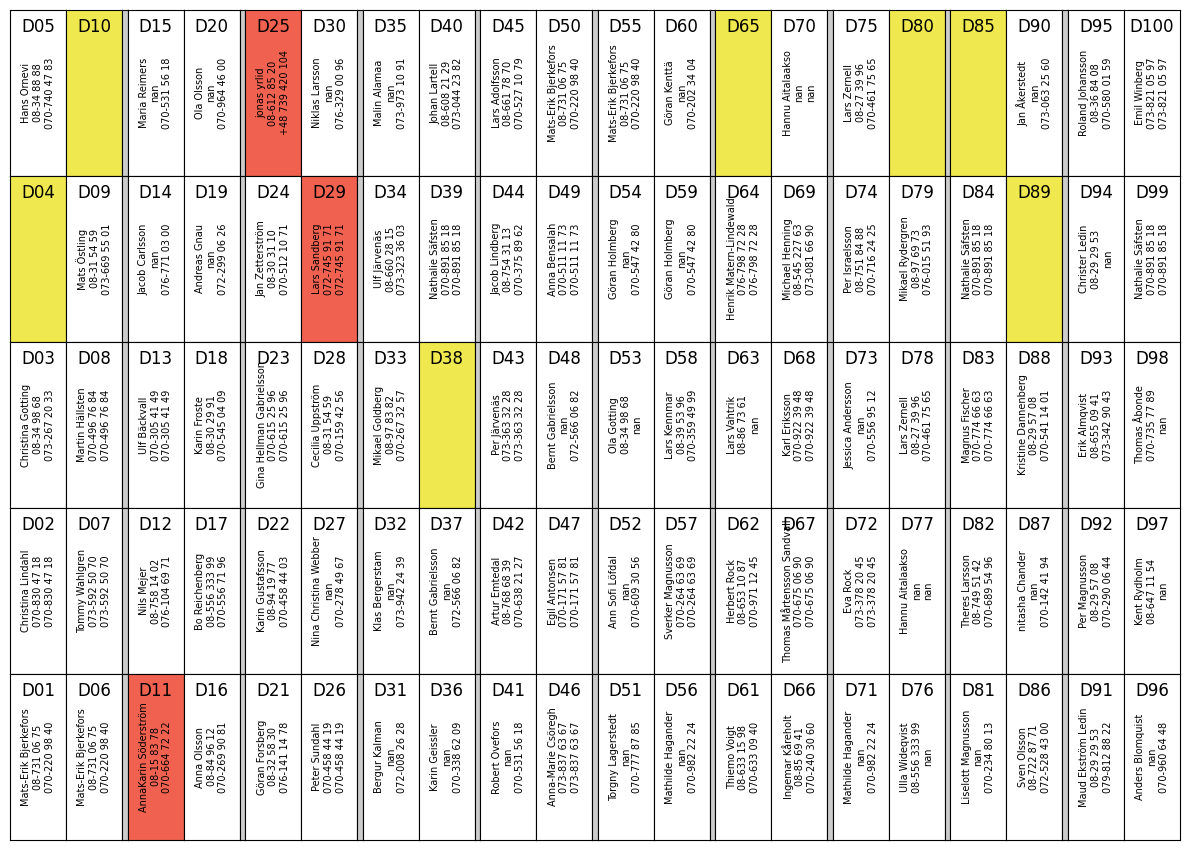

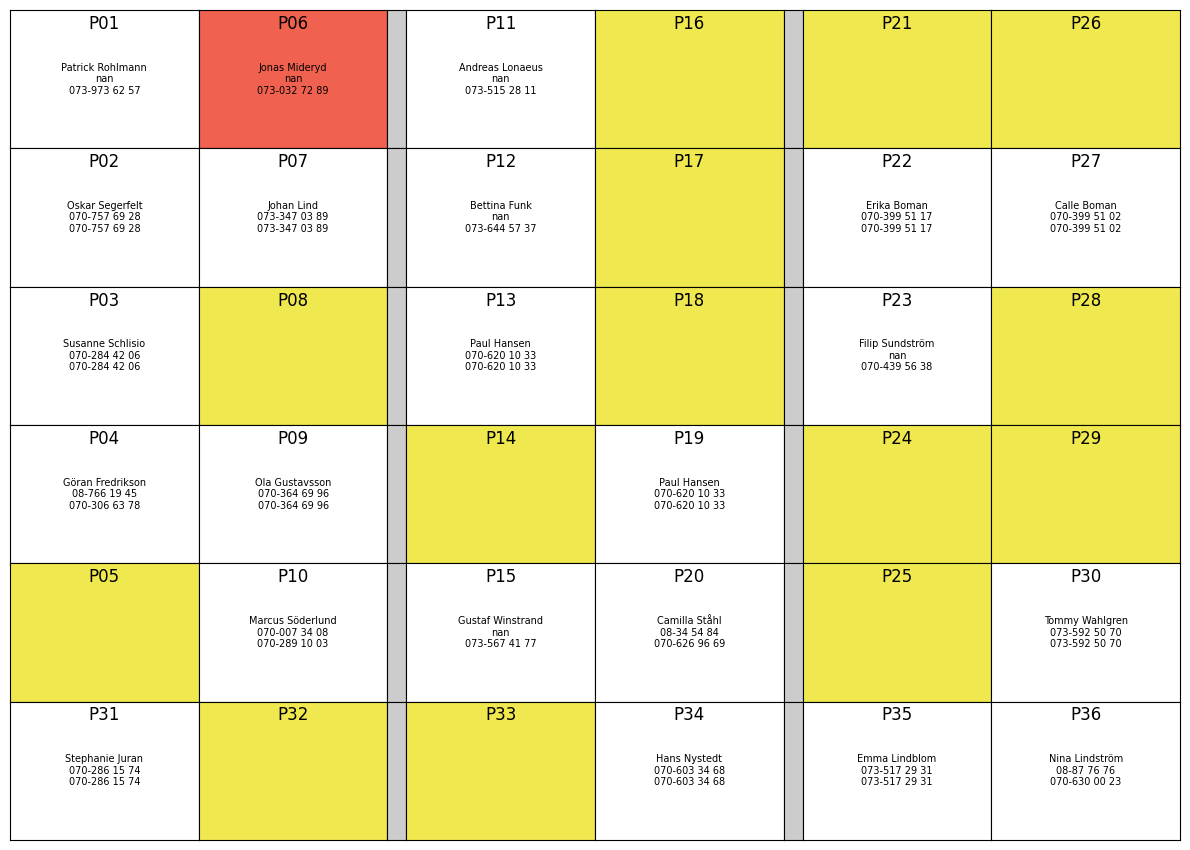

In [27]:
plot_spots(A_layout, A_widths, A_heights, df[df["Kommentar"].str[0] == "A"], text_x=0.6, text_y=0.5, title_x=0.17, title_y=0.5)
plot_spots(B_layout, B_widths, B_heights, df[df["Kommentar"].str[0] == "B"], rotate_text=True)
plot_spots(C_layout, C_widths, C_heights, df[df["Kommentar"].str[0] == "C"])
plot_spots(D_layout, D_widths, D_heights, df[df["Kommentar"].str[0] == "D"], rotate_text=True)
plot_spots(P_layout, P_widths, P_heights, df[df["Kommentar"].str[0] == "P"])

### Medlemmar utan angiven plats

In [28]:
files = os.listdir() 
files = [f for f in files if f.endswith('.xlsx') if "Grupplista" in f]
print(files)
df = pd.read_excel(files[0])

df = df[["Förnamn", "Efternamn", "Grupp", "Kommentar", "Referens", "Erlagt", "Belopp", "E-postadress"]]

# get rows where "Kommentar" and "Refers" are BOTH NaN
df = df[df["Kommentar"].isna() & df["Referens"].isna()]
df

['2025-08-02_10_36_49_brunnsvikens-kanotklubb_Grupplista.xlsx']


,Förnamn,Efternamn,Grupp,Kommentar,Referens,Erlagt,Belopp,E-postadress
254,Göran,Undén,A-förrådet 2025,NaN,NaN,1520,1520,goran@unden.eu
293,Pontus,Cronholm,A-förrådet 2025,NaN,NaN,620,620,poncr100@gmail.com
